In [44]:
import os
import copy
import math
import random
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm # pip install tqdm
from collections import OrderedDict

from functools import partial
import pandas_profiling as pp # pip install pandas_profiling

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style='white')
sns.set_palette("bright")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# User created modules
import feature_engineer as fe
import evaluator as ev
import explorator as ex

# Reload user created modules to get latest changes
import importlib
importlib.reload(fe);
importlib.reload(ev);
importlib.reload(ex);

In [5]:
data_dir = 'data/'
reports_dir = 'reports/'

# Load Data

In [3]:
df_train_sample = pd.read_csv(os.path.join(data_dir, 'train_clean_sample.csv'))

In [13]:
df_train = pd.read_csv(os.path.join(data_dir, 'train_final.csv'))

# Pandas Profiling

In [8]:
%%time
sample_profile = pp.ProfileReport(df_train_sample)
sample_profile.to_file(outputfile=os.path.join(reports_dir, 'sample_data_report.html'))

Wall time: 1min 51s


In [20]:
# %%time
# profile = pp.ProfileReport(df_train)
# profile.to_file(outputfile=os.path.join(reports_dir, 'data_report.html'))

# Exploratory Analysis

- Number of unique Wikipedia names
- Distribution of Wikipedia projects
- Distribution of languages
- Distribution of access
- Distribution of agent
- Strategy for dealing with missing values in final dataset
- Time series visualization for 3 random pages
- Time series visualization for languages
- Time series visualization for 3 random Wikipedia projects
- Trend analysis for a few random pages

### Pages and Names Analysis

In [21]:
unique_pages = df_train['Page'].nunique()
print(f'Number of unique pages: {unique_pages}')

Number of unique pages: 145063


In [22]:
unique_names = df_train['Name'].nunique()
print(f'Number of unique names: {unique_names}')

Number of unique names: 49174


In [23]:
unique_pages / len(df_train) * 100

100.0

In [24]:
unique_names / unique_pages * 100

33.898375188711114

In [25]:
unique_names_sample = df_train_sample['Name'].nunique()
print(f'Number of unique names in sample: {unique_names_sample}')

Number of unique names in sample: 100


In [26]:
unique_names_sample / len(df_train_sample) * 100

100.0

### Project Analysis

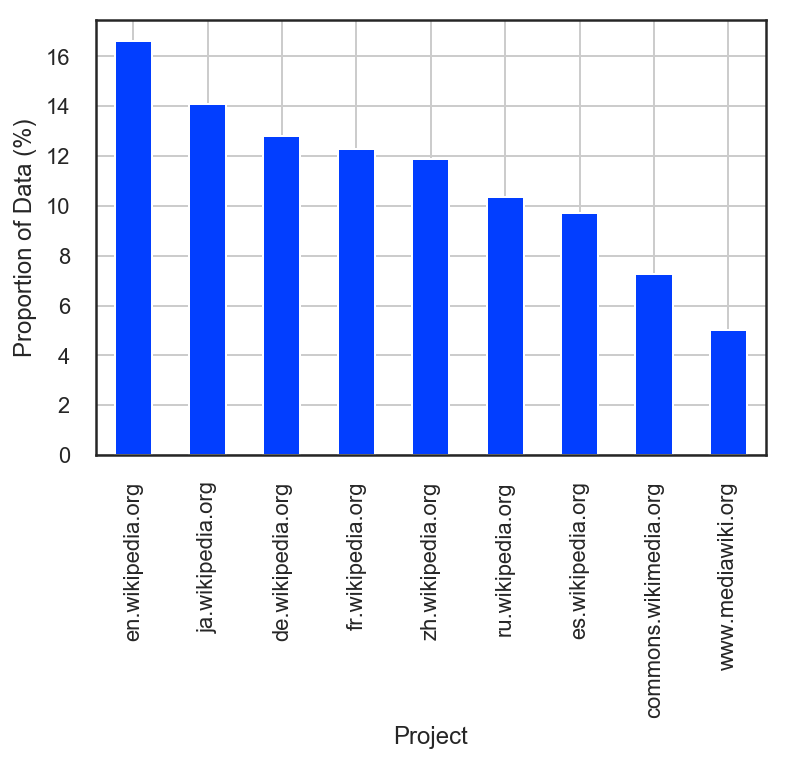

In [45]:
_, f, ax = ex.plot_value_counts_pc(df_train, 'Project')

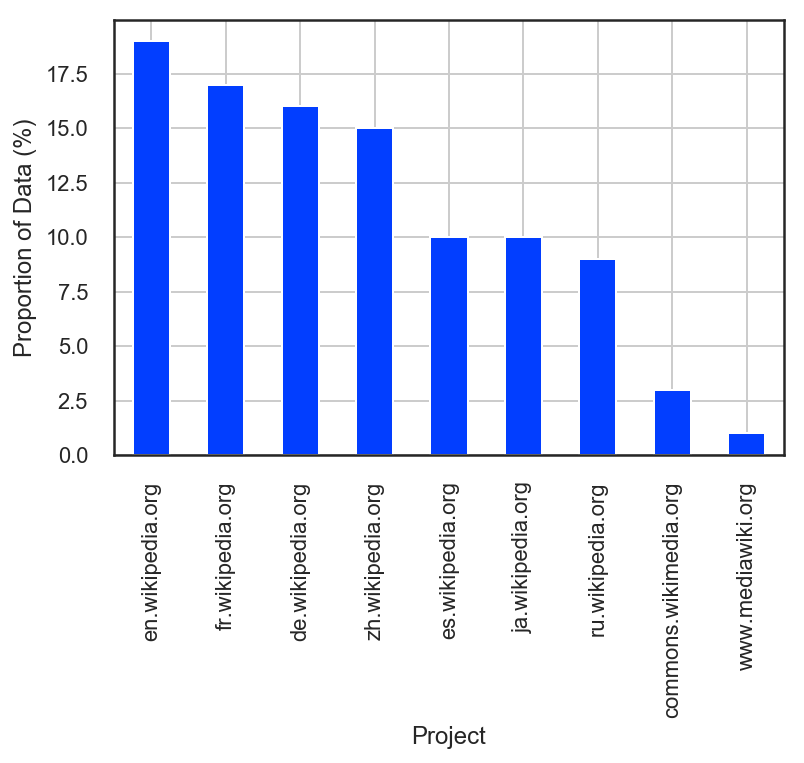

In [46]:
_, f, ax = ex.plot_value_counts_pc(df_train_sample, 'Project')

### Language Analysis

In [31]:
df_train['Language'] = df_train['Project'].apply(fe.extract_language)
df_train_sample['Language'] = df_train_sample['Project'].apply(fe.extract_language)

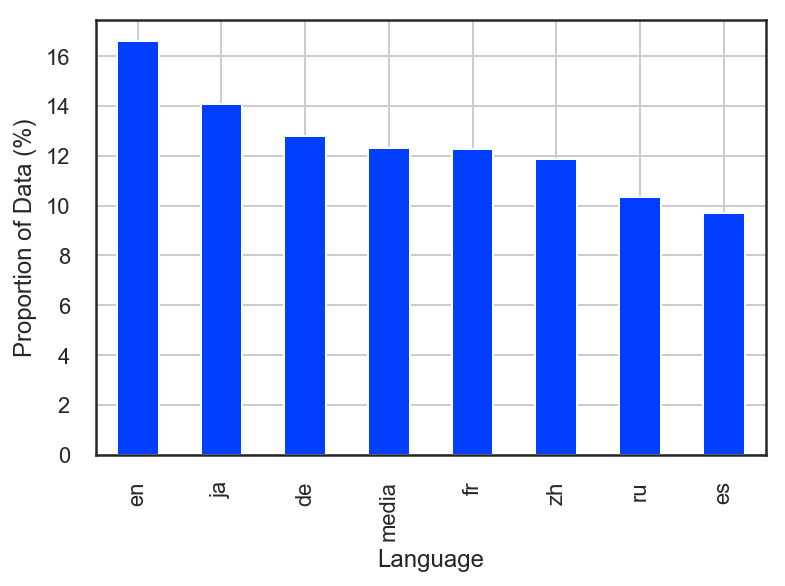

In [47]:
_, f, ax = ex.plot_value_counts_pc(df_train, 'Language')

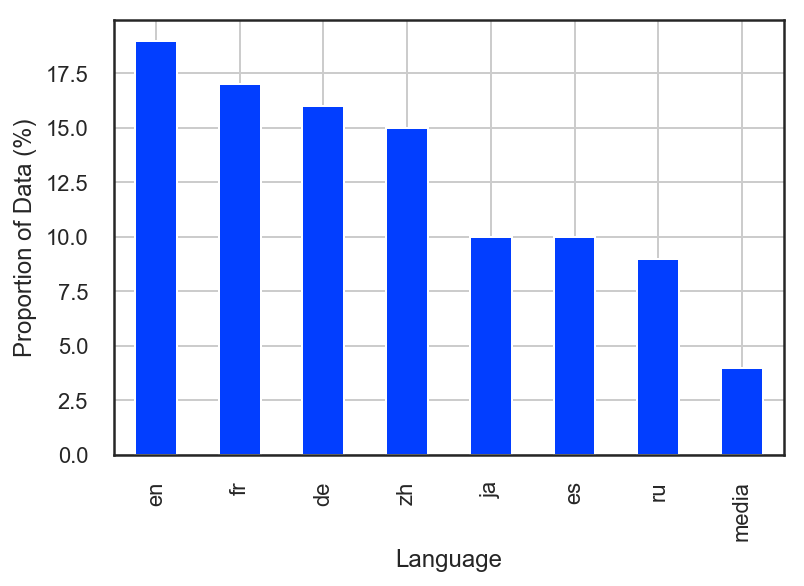

In [48]:
_, f, ax = ex.plot_value_counts_pc(df_train_sample, 'Language')

### Access Analysis

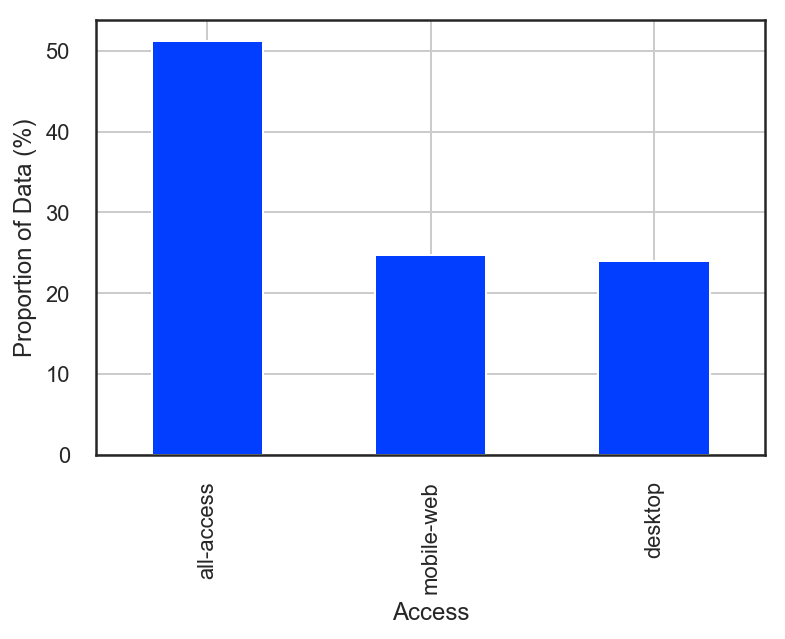

In [50]:
_, f, ax = ex.plot_value_counts_pc(df_train, 'Access')

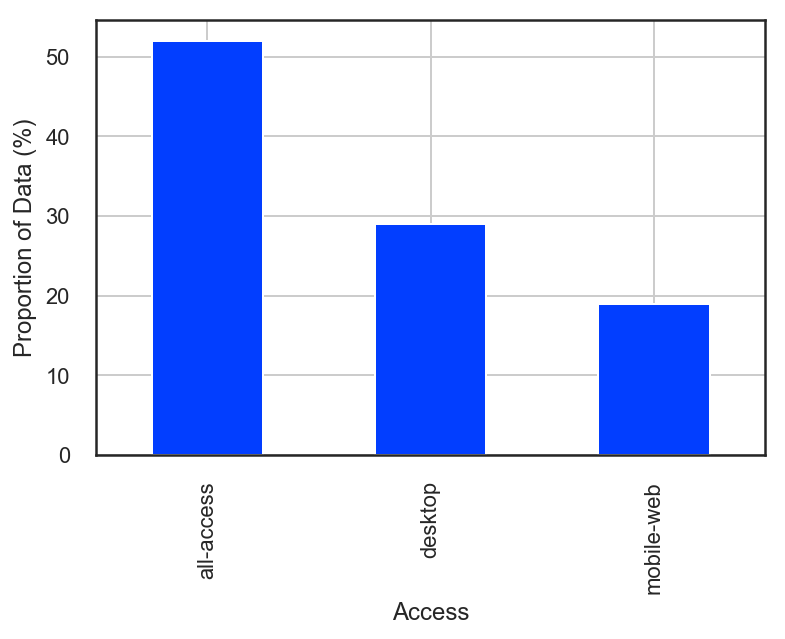

In [51]:
_, f, ax = ex.plot_value_counts_pc(df_train_sample, 'Access')

### Agent Analysis

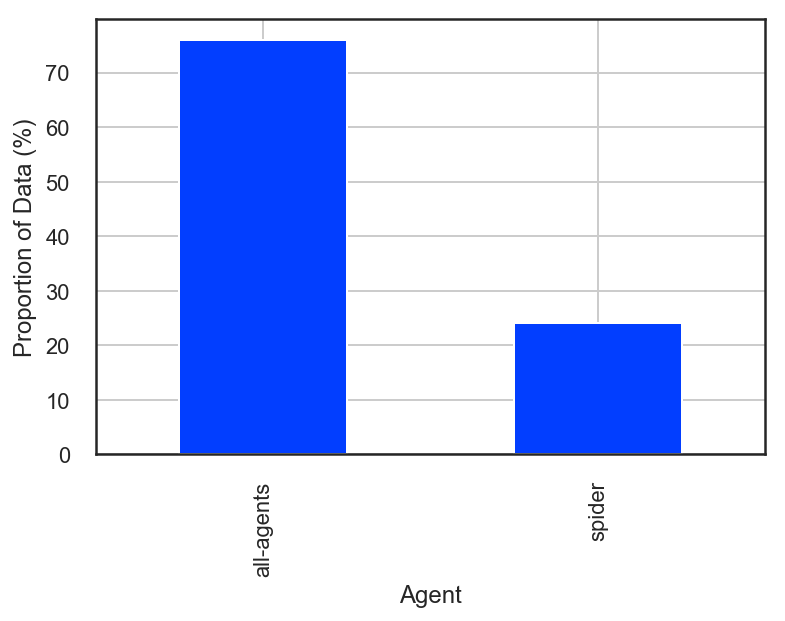

In [52]:
_, f, ax = ex.plot_value_counts_pc(df_train, 'Agent')

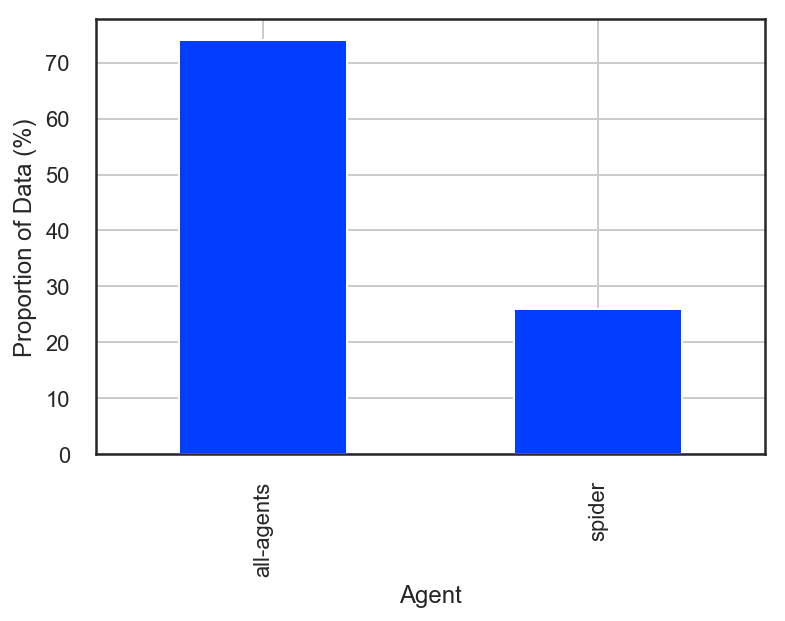

In [53]:
_, f, ax = ex.plot_value_counts_pc(df_train_sample, 'Agent')

### Missing Value Analysis

In [58]:
categorical_cols = df_train.columns.values[:5]
date_cols = df_train.columns.values[5:]
print(categorical_cols)
print(len(date_cols))

['Page' 'Name' 'Project' 'Access' 'Agent']
804


In [62]:
df_train_cat = df_train[categorical_cols]
df_train_cat.loc[:, 'missing_count'] = df_train.isnull().sum(axis=1).tolist()
df_train_cat.loc[:, 'missing_pc'] = df_train_cat['missing_count'] / len(date_cols) * 100
df_train_cat.head()

,Page,Name,Project,Access,Agent,missing_count,missing_pc
0,2NE1_zh.wikipedia.org_all-access_spider,2NE1,zh.wikipedia.org,all-access,spider,0,0.00000
1,2PM_zh.wikipedia.org_all-access_spider,2PM,zh.wikipedia.org,all-access,spider,0,0.00000
2,3C_zh.wikipedia.org_all-access_spider,3C,zh.wikipedia.org,all-access,spider,0,0.00000
3,4minute_zh.wikipedia.org_all-access_spider,4minute,zh.wikipedia.org,all-access,spider,0,0.00000
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider,291,36.19403


In [63]:
df_train_cat['missing_pc'].describe()

count    145063.000000
mean          6.025301
std          16.586219
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          99.751244
Name: missing_pc, dtype: float64

In [71]:
df_train_cat.loc[:, 'valid_pc'] = 100 - df_train_cat['missing_pc']

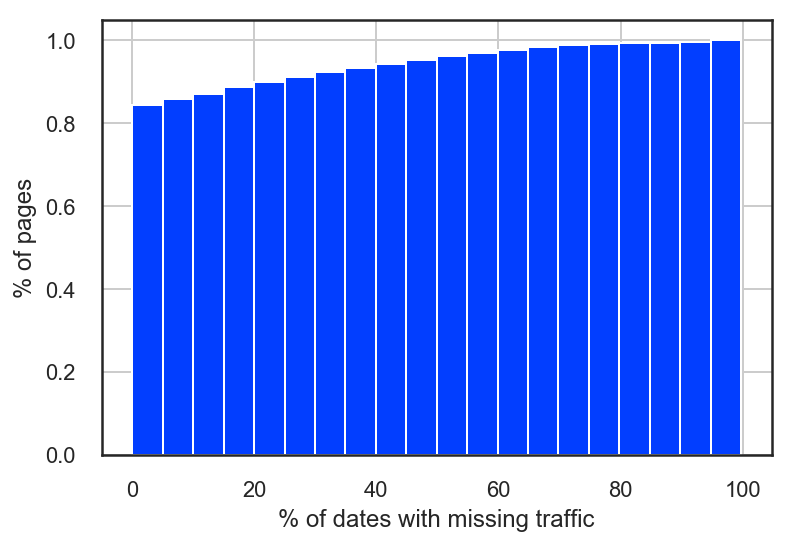

In [78]:
f, ax = plt.subplots()
df_train_cat['missing_pc'].hist(cumulative=True, density=1, bins=20, ax=ax)
ax.set_xlabel('% of dates with missing traffic')
ax.set_ylabel('% of pages');

In [82]:
df_train_cat[df_train_cat['missing_pc'] > 90]['Project'].value_counts()

ja.wikipedia.org         356
commons.wikimedia.org    231
www.mediawiki.org        140
zh.wikipedia.org          22
de.wikipedia.org          15
en.wikipedia.org          11
ru.wikipedia.org          10
fr.wikipedia.org           5
es.wikipedia.org           1
Name: Project, dtype: int64

### Time Series Visualization

In [83]:
df_train_sample.head()

,Page,Name,Project,Access,Agent,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,Language
0,Ostermontag_de.wikipedia.org_all-access_all-ag...,Ostermontag,de.wikipedia.org,all-access,all-agents,32.0,29.0,29.0,31.0,25.0,...,18.0,19.0,32.0,33.0,40.0,36.0,24.0,25.0,26.0,de
1,Alois_Brunner_de.wikipedia.org_all-access_all-...,Alois_Brunner,de.wikipedia.org,all-access,all-agents,95.0,138.0,110.0,89.0,120.0,...,116.0,119.0,265.0,250.0,380.0,254.0,180.0,124.0,190.0,de
2,松来未祐_ja.wikipedia.org_all-access_all-agents,松来未祐,ja.wikipedia.org,all-access,all-agents,1381.0,851.0,600.0,1358.0,2083.0,...,1100.0,1169.0,932.0,955.0,992.0,1097.0,943.0,1023.0,1150.0,ja
3,ラマダーン_ja.wikipedia.org_desktop_all-agents,ラマダーン,ja.wikipedia.org,desktop,all-agents,809.0,774.0,745.0,395.0,439.0,...,93.0,105.0,141.0,150.0,115.0,149.0,113.0,63.0,73.0,ja
4,Fabian_Hambüchen_de.wikipedia.org_mobile-web_a...,Fabian_Hambüchen,de.wikipedia.org,mobile-web,all-agents,24.0,49.0,31.0,41.0,43.0,...,137.0,80.0,53.0,58.0,38.0,55.0,98.0,99.0,80.0,de


In [107]:
df_train_sample_melt = pd.melt(df_train_sample, id_vars=['Page', 'Name', 'Project', 'Access', 'Agent', 'Language'], var_name='Date', value_name='Visits')

In [108]:
df_train_sample_melt['Date'] = df_train_sample_melt['Date'].astype('datetime64[ns]')

In [109]:
df_train_sample_melt.head()

,Page,Name,Project,Access,Agent,Language,Date,Visits
0,Ostermontag_de.wikipedia.org_all-access_all-ag...,Ostermontag,de.wikipedia.org,all-access,all-agents,de,2015-07-01,32.0
1,Alois_Brunner_de.wikipedia.org_all-access_all-...,Alois_Brunner,de.wikipedia.org,all-access,all-agents,de,2015-07-01,95.0
2,松来未祐_ja.wikipedia.org_all-access_all-agents,松来未祐,ja.wikipedia.org,all-access,all-agents,ja,2015-07-01,1381.0
3,ラマダーン_ja.wikipedia.org_desktop_all-agents,ラマダーン,ja.wikipedia.org,desktop,all-agents,ja,2015-07-01,809.0
4,Fabian_Hambüchen_de.wikipedia.org_mobile-web_a...,Fabian_Hambüchen,de.wikipedia.org,mobile-web,all-agents,de,2015-07-01,24.0


In [113]:
categorical_cols = np.append(categorical_cols, 'Language')

In [114]:
np.random.seed(100)
random_pages = np.random.choice(df_train_sample_melt['Page'].unique().tolist(), 3, replace=False)
print(random_pages)

['山口もえ_ja.wikipedia.org_all-access_all-agents'
 'Krampus_(film)_en.wikipedia.org_all-access_spider'
 'Justin_Timberlake_fr.wikipedia.org_all-access_all-agents']


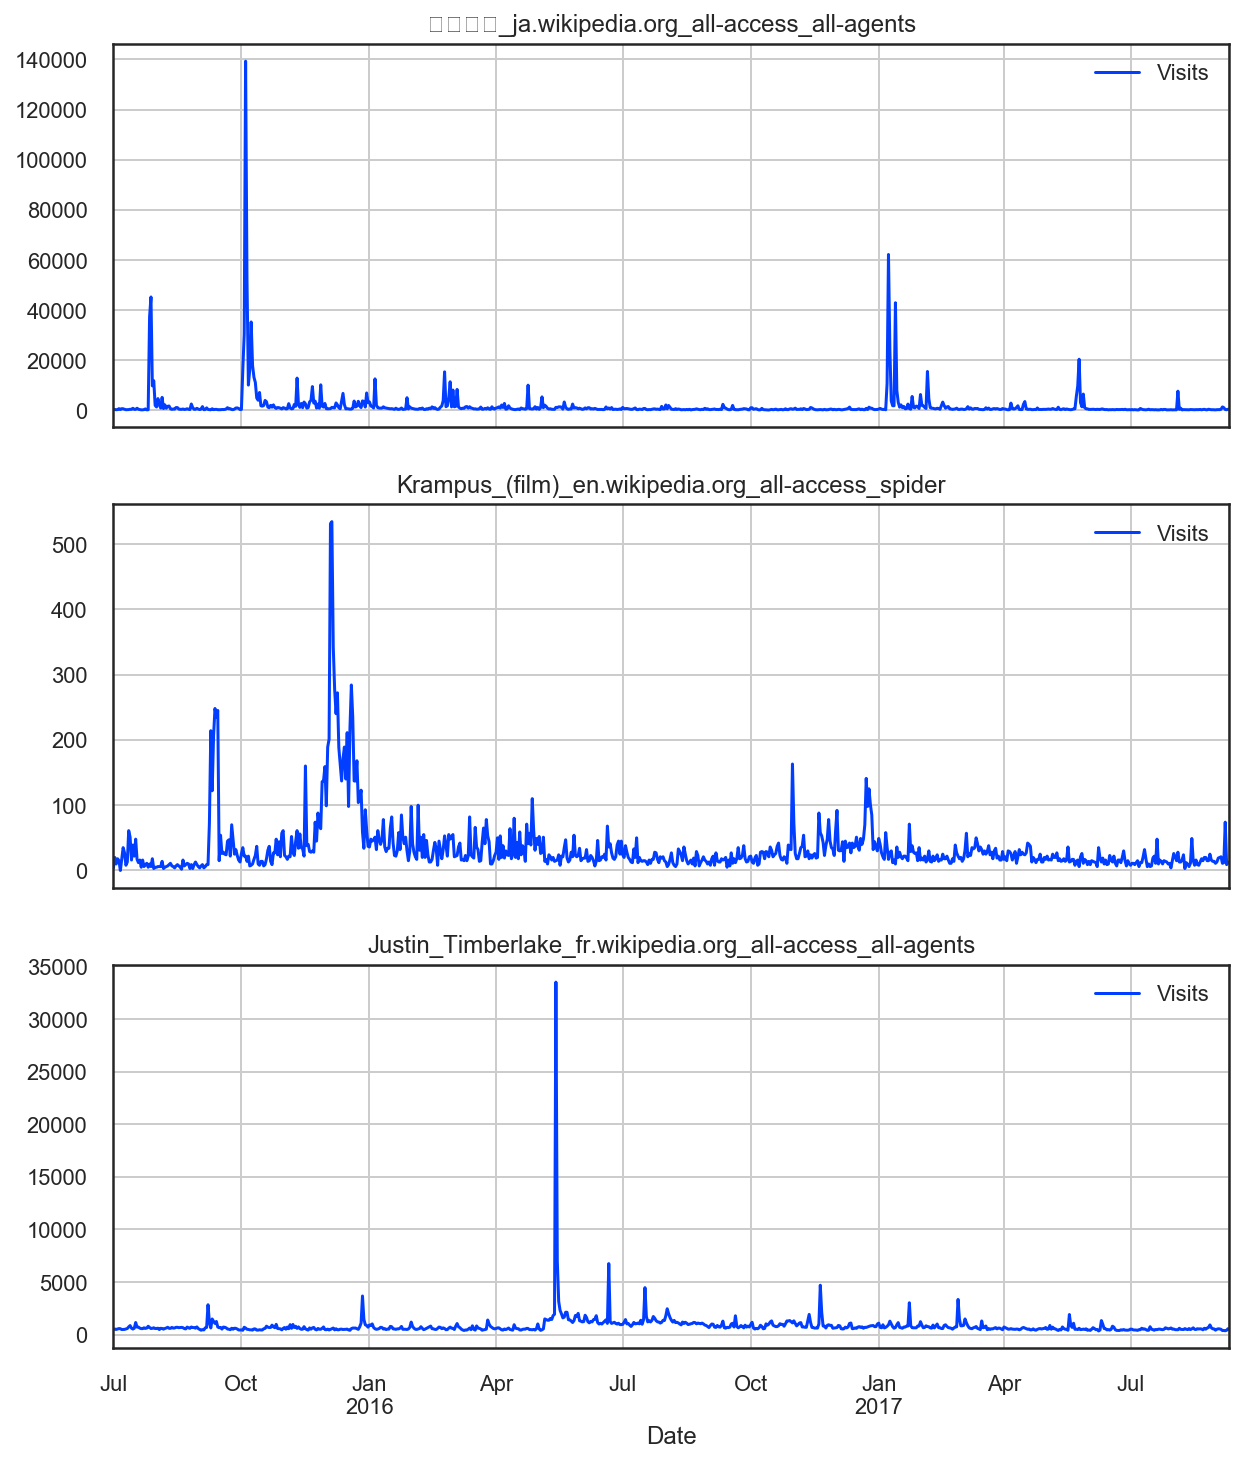

In [123]:
f, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 12))
for idx, page in enumerate(random_pages):
    df_page = df_train_sample_melt[df_train_sample_melt['Page'] == page].sort_values(by='Date').reset_index(drop=True)
    df_page = df_page.drop(columns=categorical_cols)
    df_page = df_page.set_index('Date')
    df_page.plot(ax=ax[idx])
    ax[idx].set_title(page)
    ax[idx].grid(True);

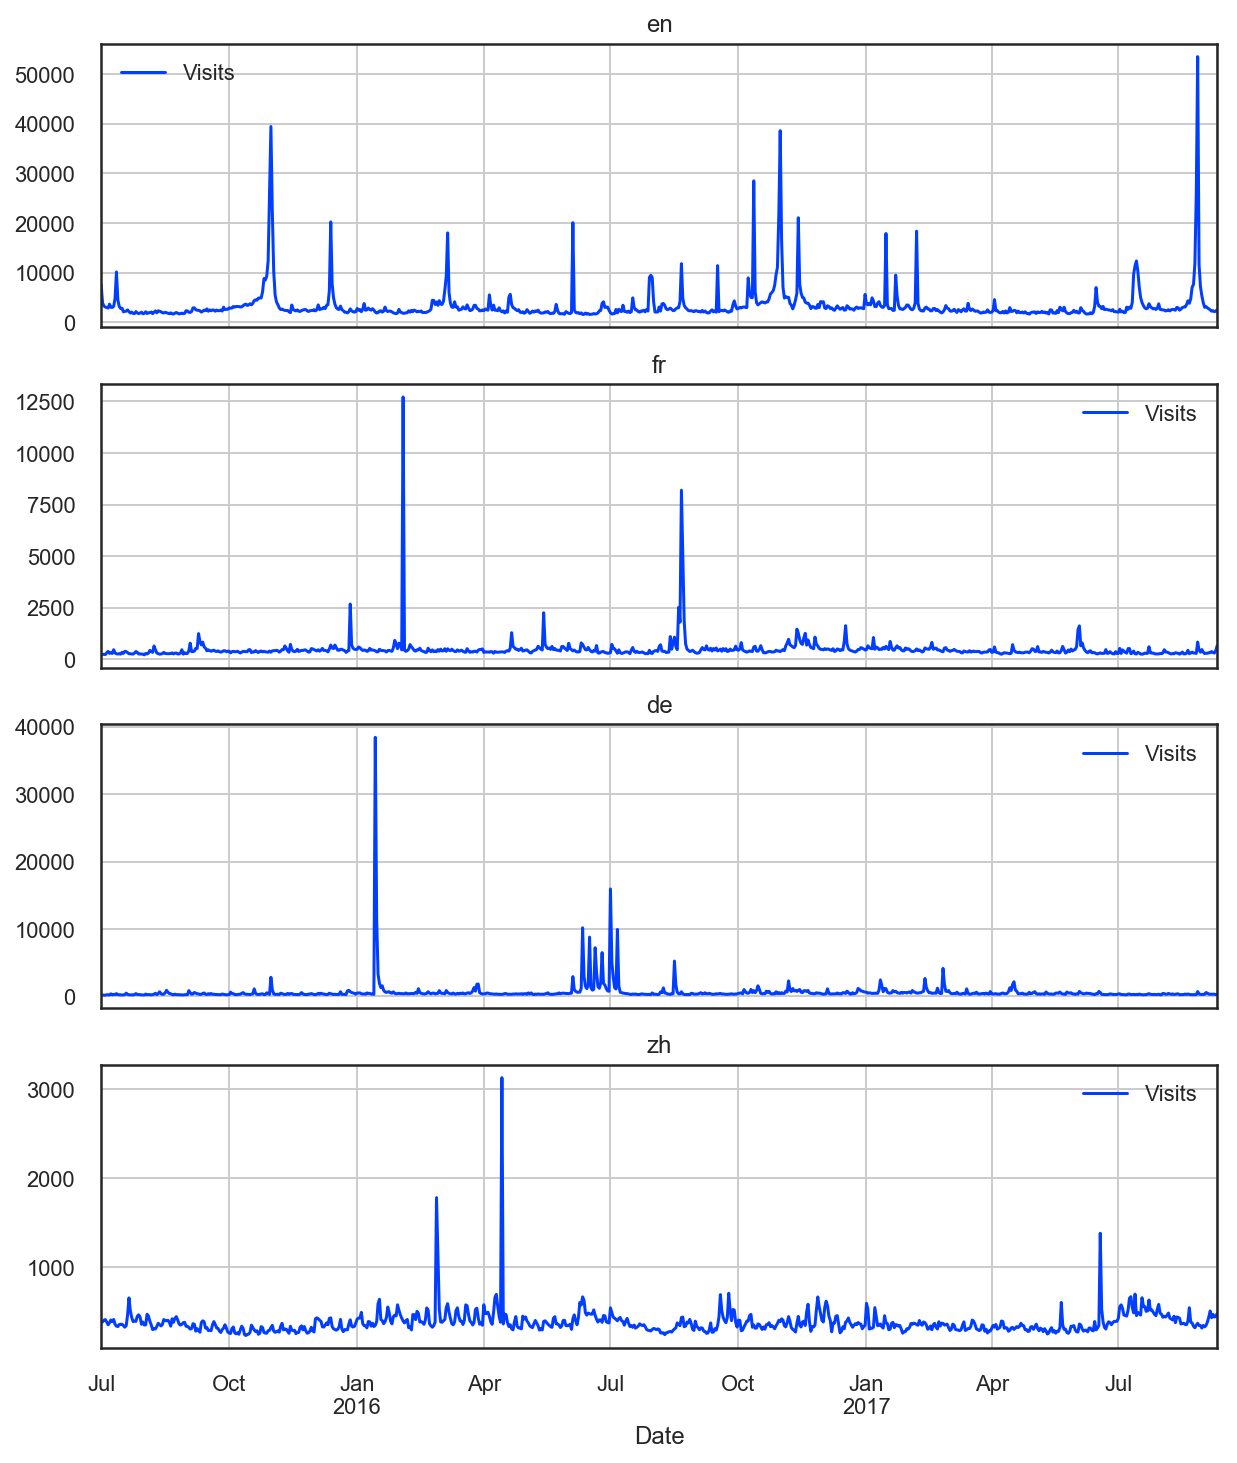

In [129]:
df_language_visits = df_train_sample_melt.groupby(['Language', 'Date']).agg({'Visits': 'mean'}).reset_index()
top_languages = ['en', 'fr', 'de', 'zh']
f, ax = plt.subplots(4, 1, sharex=True, figsize=(10, 12))
for idx, language in enumerate(top_languages):
    df_lv = df_language_visits[df_language_visits['Language'] == language].sort_values(by='Date').reset_index(drop=True)
    df_lv = df_lv.drop(columns='Language')
    df_lv = df_lv.set_index('Date')
    df_lv.plot(ax=ax[idx])
    ax[idx].grid(True)
    ax[idx].set_title(language);